In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor
import pandas as pd
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [135]:
# Load the pretrained AutoGluon model
model_path = "AutogluonModels/NO2 5.1"  # Replace with the path to your saved model
predictor = TabularPredictor.load(model_path)

In [137]:
# Load the data from the CSV file
df_t = pd.read_csv('dataT.csv')

# Drop columns with any missing or empty cells
df_t = df_t.dropna(axis=0)

In [139]:
label_column = predictor.label  # The name of the target column

# Separate features and target
y_true = df_t[label_column]
X_test = df_t.drop(columns=[label_column])

# Generate predictions
y_pred = predictor.predict(X_test)

# Calculate metrics
r2 = r2_score(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

metrics = {
    "R^2": r2,
    "RMSE": rmse,
    "MAE": mae,
}

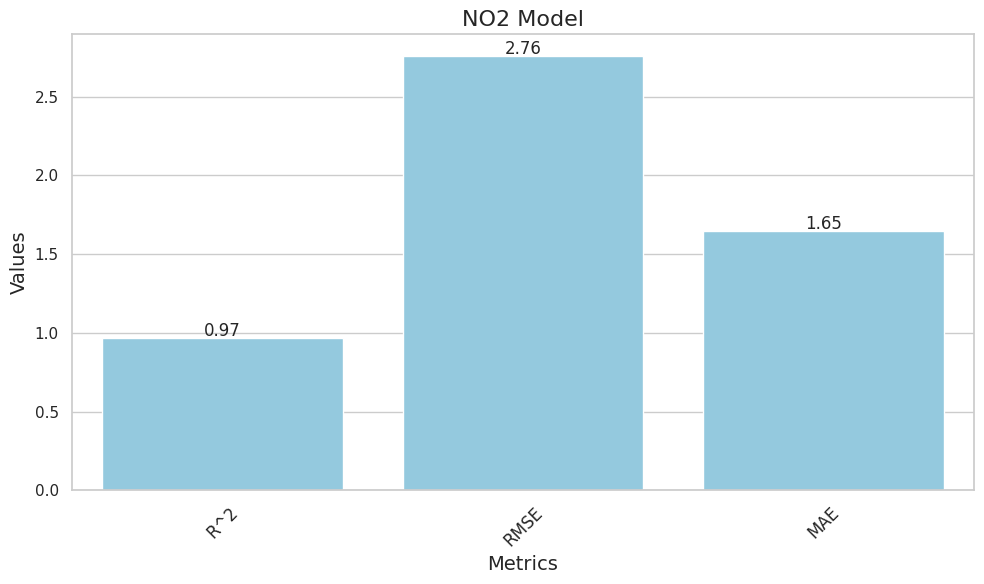

In [140]:
# Create a bar plot of the metrics
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), color="skyblue")  # Simplified color

# Add labels to the bars
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)

# Title and labels
plt.title( label_column + " Model", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [123]:
# Display the leaderboard of trained models
predictor.leaderboard(extra_info=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-0.055048,root_mean_squared_error,4.912897,2606.038521,0.000232,0.012611,3,True,131,...,"{'use_orig_features': False, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[ExtraTreesMSE_BAG_L2, RandomForest_r15_BAG_L2, NeuralNetTorch_r36_BAG_L2, RandomForest_r39_BAG_L2, NeuralNetTorch_r87_BAG_L2, LightGBM_r135_BAG_L2]",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 20},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[ExtraTreesMSE_BAG_L2, NeuralNetTorch_r79_BAG_L1, XGBoost_r33_BAG_L1, ExtraTrees_r42_BAG_L1, NeuralNetFastAI_r191_BAG_L1, NeuralNetTorch_r30_BAG_L1, CatBoost_BAG_L1, RandomForest_r15_BAG_L2, CatBoost_r13_BAG_L1, NeuralNetTorch_r87_BAG_L2, LightGBM_r131_BAG_L1, LightGBMXT_BAG_L1, LightGBM_r135_BAG_L2, NeuralNetFastAI_r145_BAG_L1, KNeighborsDist_BAG_L1, XGBoost_r89_BAG_L1, NeuralNetTorch_r36_BAG_L2, ExtraTreesMSE_BAG_L1, KNeighborsUnif_BAG_L1, RandomForest_r195_BAG_L1, RandomForestMSE_BAG_L1, RandomForest_r39_BAG_L2]",[]
1,ExtraTreesMSE_BAG_L2,-0.055935,root_mean_squared_error,4.184938,2529.774438,0.143321,1.347423,2,True,39,...,"{'use_orig_features': True, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'use_child_oof': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[BRDF_Albedo_Parameters_Band6_iso, O3_column_number_density, sur_refl_b03, BRDF_Albedo_Parameters_Band5_iso, I1, BRDF_Albedo_Parameters_nir_geo, Band_6, QV2M, latitude, dewpoint_temperature_2m, BRDF_Albedo_Parameters_Band2_geo, SO2, M7, KNeighborsDist_BAG_L1, BRDF_Albedo_Parameters_Band3_iso, BRDF_Albedo_Parameters_shortwave_vol, date, M11, date.month, BRDF_Albedo_Parameters_Band4_iso, surface_net_thermal_radiation_sum, RandomForestMSE_BAG_L1, Sur_refl11, Nadir_Reflectance_Band1, LightGBMXT_BAG_L1, sur_refl_b05, BRDF_Albedo_Parameters_vis_iso, BRDF_Albedo_Parameters_shortwave_geo, I3, date...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000, 'n_jobs': -1, 'random_state': 0, 'bootstrap': True, 'criterion': 'squared_error'}",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None}","[NeuralNetFastAI_r191_BAG_L1, NeuralNetFastAI_r145_BAG_L1, KNeighborsDist_BAG_L1, NeuralNetTorch_r30_BAG_L1, XGBoost_r89_BAG_L1, NeuralNetTorch_r79_BAG_L1, XGBoost_r33_BAG